# Section 2 Mean Variance Optimization

In [1]:
# packages that are used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

## Part 1
### Reading and cleaning the data

* Reading and checking if the data types are correct
* General Data checking and cleaning operations

In [2]:
# reading in the data

data = pd.read_excel(r"/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/multi_asset_etf_data.xlsx",
                    sheet_name = 'excess returns')

In [3]:
data.head()

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
0,2009-04-30,0.008439,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295597,0.229649,0.022329,0.098792,-0.018505
1,2009-05-31,0.054144,0.163135,0.159872,0.132390,0.029027,-0.020301,0.023200,0.054364,0.028337,0.058925,0.020438
2,2009-06-30,0.004549,-0.026858,-0.023094,-0.014648,0.032918,-0.006171,-0.025463,0.044849,-0.004036,-0.001254,0.001382
3,2009-07-31,0.031311,0.018595,0.110173,0.100442,0.069217,0.008345,0.105826,0.143274,0.015353,0.074633,0.000906
4,2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017405,0.007198,0.131503,0.032977,-0.004587,0.036505,0.007978


In [4]:
#Setting the index as date

data.set_index('Date',inplace = True)

In [5]:
data.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008439,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295597,0.229649,0.022329,0.098792,-0.018505
2009-05-31,0.054144,0.163135,0.159872,0.132390,0.029027,-0.020301,0.023200,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014648,0.032918,-0.006171,-0.025463,0.044849,-0.004036,-0.001254,0.001382
2009-07-31,0.031311,0.018595,0.110173,0.100442,0.069217,0.008345,0.105826,0.143274,0.015353,0.074633,0.000906
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017405,0.007198,0.131503,0.032977,-0.004587,0.036505,0.007978


### 1a.

In [7]:
def summary_stats(df):
    
    """
    Avg Return : Show the annualized return
    Avg Volatility : Show the annulized volatility
    Sharpe Ratio : The ratio of avg return and avg volatility

    """
    
    mean_return = df.mean() * 12
    vol = df.std() * np.sqrt(12)
    sharpe = mean_return / vol
    
    stats = pd.DataFrame({
        'Avg Return' : mean_return,
        'Avg Volatility' : vol,
        'Sharpe Ratio' : sharpe
    })
    
    return stats

summ = summary_stats(data)
summ

,Avg Return,Avg Volatility,Sharpe Ratio
BWX,0.020819,0.074304,0.280189
DBC,0.010053,0.177327,0.056689
EEM,0.093103,0.196190,0.474556
EFA,0.099239,0.161319,0.615174
HYG,0.081193,0.085989,0.944231
IEF,0.033424,0.056895,0.587473
IYR,0.164311,0.180085,0.912408
PSP,0.170243,0.213412,0.797721
QAI,0.027795,0.047800,0.581490
SPY,0.164907,0.139166,1.184963


Text(0.5, 1.0, 'Annualized Sharpe Ratio')

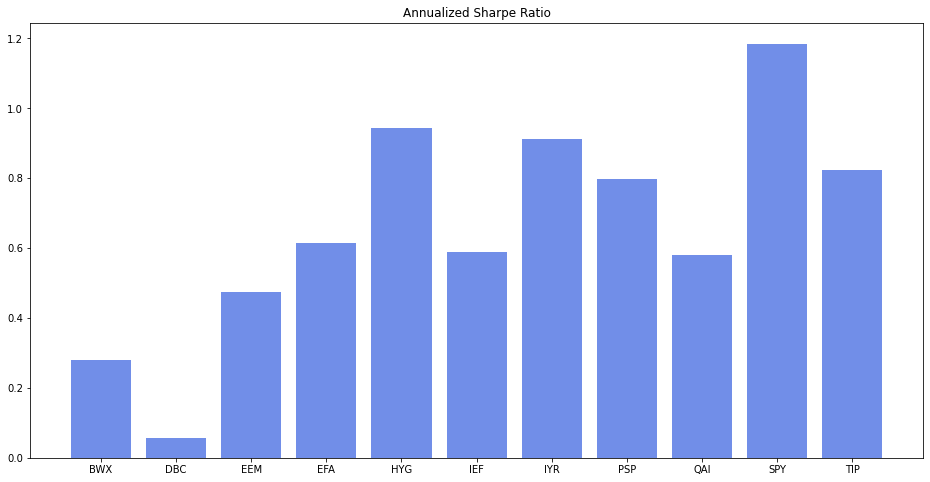

In [7]:
fig = plt.figure()
ax =plt.axes()

ax.bar(summ.index, summ['Sharpe Ratio'], color='royalblue', alpha=0.75)
ax.set_title('Annualized Sharpe Ratio')

### 1b.

* Highest and Lowest Sharpe Ratio

In [10]:
print(f"This asset has the highest sharpe ratio: {summ['Sharpe Ratio'].idxmax()}")

print(f"This asset has the lowest sharpe ratio: {summ['Sharpe Ratio'].idxmin()}")

This asset has the highest sharpe ratio: SPY
This asset has the lowest sharpe ratio: DBC


## Part 2

### 2a.

In [11]:
corr = data.corr()

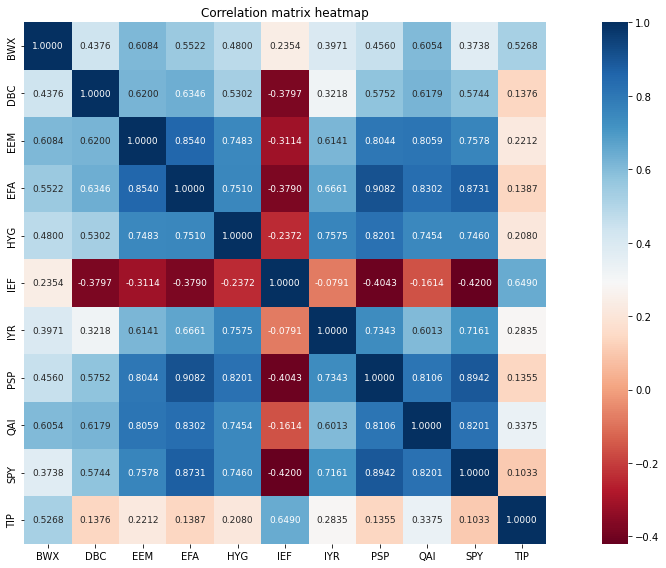

In [12]:
hm = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.4f',
                 annot_kws={'size': 9},
                 yticklabels=corr.columns,
                 xticklabels=corr.columns,cmap="RdBu")
plt.title('Correlation matrix heatmap')
plt.tight_layout()
plt.show()

In [15]:
# Finding the minimum correlation in the matrix
corr.unstack().idxmin()

('IEF', 'SPY')

In [12]:
# Defining the unstacked correlation matrix through which we can parse

unstacked_corr = pd.DataFrame(corr.unstack(),columns = ['Correlation'])

In [13]:
# Finding the maximum of all correlations less than 1 to avoid the 1.0 correlations on the diagonal

unstacked_corr.loc[unstacked_corr['Correlation'] < 1].idxmax()

Correlation    (EFA, PSP)
dtype: object

### 2b.

In [14]:
# Calculating the difference between TIPS and IEF (domestic bond ETF)

def spread(df, security1, security2, category):
    
    """
    Helper function to calculate the spread in a given category of two securities.
    
    """
    
    return (df.loc[security1, category] - df.loc[security2, category])

def spread_info(df, security1, security2):
    
    """
    Print out the difference in mean returns, volatility, and sharpe ratio of
    two securities, given a data set.
    
    """
    
    mean_spread = spread(df, security1, security2, 'Avg Return')
    vol_spread = spread(df, security1, security2, 'Avg Volatility')
    sharpe_spread = spread(df, security1, security2, 'Sharpe Ratio')
    
    print('Mean Difference: ', mean_spread, ', Volatility Difference: ', vol_spread, ', Sharpe Ratio Difference: ', sharpe_spread)
    
spread_info(summ, 'TIP', 'IEF')

Mean Difference:  0.003818093833510512 , Volatility Difference:  -0.011743606840574808 , Sharpe Ratio Difference:  0.23736270040370688


* TIPS on average returns 0.38% (38bps) greater yields compared to domestic bond ETF, denoted by IEF. TIPS also had a lower volatility of about 1.17% (117bps). This amounted to a difference in the Sharpe Ratio of 0.237.

In [15]:
# Calculating the difference between TIPS and BWX (foreign bond ETF)

spread_info(summ, 'TIP', 'BWX')

Mean Difference:  0.016423001795042812 , Volatility Difference:  -0.029152830140359798 , Sharpe Ratio Difference:  0.5446467051601502


* TIPS on average returns 1.64% (164bps) greater yield compared to foreign bonds ETF, denoted by BWX. TIPS also had a lower volatility of about 2.92% (292bps). This amounted to a difference in the Sharpe Ratio of 0.545.

### 2c.

In [16]:
corr['TIP']

BWX    0.526797
DBC    0.137627
EEM    0.221171
EFA    0.138746
HYG    0.208048
IEF    0.649038
IYR    0.283457
PSP    0.135455
QAI    0.337546
SPY    0.103265
TIP    1.000000
Name: TIP, dtype: float64

Harvard should consider TIPS to be a separate asset class from the other ten asset classes listed. This is for two reasons: (i) the relatively low correlation and (ii) the differing performance metrics relative to domestic and foreign bonds. First, the correlation between TIPS and IEF (the domestic bond ETF) is 0.649 and the correlation between TIPS and BWX (the foreign bond ETF) is 0.527. While these numbers on their own are high, compared to other correlations across the asset classes, they are quite benign. When looking at the "Correlation matrix heatmap" provided above, the large majority of asset classes have a 0.500+ correlation with one another. As such, TIPS is not heavily correlated to domestic and foreign bonds relative to the correlations seen across other distinct asset classes. In addition, TIPS has very low correlation with the other asset classes in the HMC portfolio.

In addition, one must consider the yield differential between TIPS and the two bond ETFs. The yield spread between TIPS and IEF (the domestic bond ETF) is somewhat trivial, ending up at only 38bps. However, when compared to BWX (the foreign bond ETF), the yield spread is in excess of 160bps. In addition, the volatility of TIPS is c. 1.2% lower than domestic bonds and c. 2.9% lower than foreign bonds. All of this amounts to a difference in the Sharpe Ratio of c. 0.24 and 0.55 compared to domestic and foreign bonds, respectively. As such, given the moderate correlation and significant differences in the mean returns, volatility, and Sharpe Ratio, we believe that TIPS should be considered as a separate asset class from HMC's perspective.

## Part 3

### 3a.

In [17]:
def compute_tangency(df):
    
    """
    Given a set of excess returns, calculate:
    
    1. The weights for the tangency portfolio
    2. Covariance matrix
    
    """
    
    Sigma = df.cov()
    Sigma_inv = np.linalg.inv(Sigma.copy())
    
    mu_tilde = np.array(df.mean())
    
    one_vector = np.ones((1, len(Sigma)))
    
    w_tangent = 1/(one_vector @ Sigma_inv @ mu_tilde) * (Sigma_inv @ mu_tilde)
    
    return w_tangent

w_tangent = compute_tangency(data)

In [18]:
"""
Placing weights in a dataframe

"""

tangent_portfolio = pd.DataFrame({'Stocks':summ.index, 'Weight':w_tangent})
tangent_portfolio

,Stocks,Weight
0,BWX,-0.259236
1,DBC,-0.049786
2,EEM,0.068120
3,EFA,-0.157671
4,HYG,0.775635
5,IEF,1.734962
6,IYR,-0.366667
7,PSP,-0.000685
8,QAI,-2.477194
9,SPY,1.540749


### 3b.

In [19]:
def portfolio_info(df, w_portfolio):
    
    """
    Given a set of excess returns and weight allocation of a portfolio,
    output the return, volatility, and Sharpe Ratio of the portfolio.
    
    """
    
    summ_df = summary_stats(df)
    
    Sigma = df.cov()
    
    portfolio_return = (w_portfolio @ summ_df['Avg Return'])
    portfolio_vol = np.sqrt(w_portfolio.T @ Sigma @ w_portfolio) * np.sqrt(12)
    portfolio_sharpe = portfolio_return / portfolio_vol
    
    return np.array([portfolio_return, portfolio_vol, portfolio_sharpe])

def print_portfolio_info(df, w_portfolio):
    
    """
    Given a set of excess returns and weight allocation of a portfolio,
    print out a statement regarding the return, volatility, and Sharpe Ratio of the portfolio.
    
    """
    
    portfolio_stats = portfolio_info(df, w_portfolio)
    
    print('Return: ', portfolio_stats[0], ', Volatility: ', portfolio_stats[1], ', Sharpe Ratio: ', portfolio_stats[2])

portfolio_info(data, w_tangent)

array([0.23776716, 0.10480198, 2.26872781])

In [20]:
print_portfolio_info(data, w_tangent)

Return:  0.23776716339549853 , Volatility:  0.10480197847812861 , Sharpe Ratio:  2.268727812663563


## Part 4

### 4a.

In [21]:
def compute_mv_portfolio(df, target_return):
    
    """
    Given a set of excess returns, calculate the portfolio weight allocation required
    to achieve the target return.
    
    """
    
    # Defining the necessary variables for the formula
    Sigma = df.cov()
    Sigma_inv = np.linalg.inv(Sigma.copy())
    
    mu_tilde = df.mean() * 12
    
    one_vector = np.ones((1, len(Sigma)))
    
    w_tan = compute_tangency(df)
    
    # Calculating the scaling factor for weight allocations to w_tan based on the target return
    
    delta_tilde = ((one_vector @ Sigma_inv @ mu_tilde) / (mu_tilde.T @ Sigma_inv @ mu_tilde)) * target_return
    
    # Calculating weights of MV portfolio
    
    mv_portfolio = delta_tilde * w_tan
    
    return mv_portfolio

mv_weights = compute_mv_portfolio(data, 0.12)

In [22]:
weight_adjusted = pd.DataFrame({'Stocks':summ.index, 'Weight':mv_weights})

weight_adjusted

,Stocks,Weight
0,BWX,-0.130835
1,DBC,-0.025127
2,EEM,0.034380
3,EFA,-0.079576
4,HYG,0.391459
5,IEF,0.875628
6,IYR,-0.185055
7,PSP,-0.000346
8,QAI,-1.250228
9,SPY,0.777609


### 4b.

In [23]:
print_portfolio_info(data, mv_weights)

Return:  0.11999999999999997 , Volatility:  0.05289307925357335 , Sharpe Ratio:  2.2687278126635633


### 4c.

* When we compare the weight adjusted portfolio with the tangent portfolio, it has cut the weights by half. This has the result of cutting the return and volatility in half. The Sharpe Ratio has stayed the same given the proportional reductions across the return and volatility.

* The weight adjusted portfolio's top 3 long positions are SPY, IEF, and HYG. The top 3 short positions of the portfolio are in QAI, IYR, and BWX. If we look at the weights of weight adjusted portfolio for the top 3 long postions, they are nearly half of the weights from the tangent portfolio. The same goes for the top 3 short positions.

### 4d.

* To a certain extent yes, but it also depends on the correlation/covariances between the assets. For example, of the ETFs with the  five highest Sharpe Ratios (SPY, HYG, IYR, TIP, and PSP), the portfolio is long three of the securities and short two of the securities. In addition, of the ETFs with the five lowest Sharpe Ratios (DBC, BWX, EEM, QAI, and IEF), the portfolio is long two of the securities and short three of the securities.

In [24]:
# Table comparing the Sharpe Ratios to weight allocated according to the weight adjusted portfolio, 
# sorted in ascending order by Sharpe Ratio.

pd.DataFrame({'Sharpe Ratio':summ['Sharpe Ratio'], 'Weight':mv_weights}).sort_values(by='Sharpe Ratio', ascending = True)

,Sharpe Ratio,Weight
DBC,0.056689,-0.025127
BWX,0.280189,-0.130835
EEM,0.474556,0.034380
QAI,0.581490,-1.250228
IEF,0.587473,0.875628
EFA,0.615174,-0.079576
PSP,0.797721,-0.000346
TIP,0.824835,0.096787
IYR,0.912408,-0.185055
HYG,0.944231,0.391459


## Part 5

### 5a.

In [25]:
# Creating array of weights

equally_weighted = np.array([1/11]*11)

equally_weighted

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

In [26]:
# Performance of the equally weighted portfolio, using weights of 1/11.

print_portfolio_info(data, equally_weighted)

Return:  0.0820299518246152 , Volatility:  0.0981325212646509 , Sharpe Ratio:  0.8359099589767074


In [27]:
# Scaling factor required to achieve 1% monthly returns (12% annualized) using the equally weighted portfolio

delta_tilde = 0.12 / portfolio_info(data, equally_weighted)[0]

delta_tilde

1.462880293488005

In [28]:
# Creating weights for portfolio with target mean monthly return of 0.01 (0.12 annualized)

equally_weighted_adj = delta_tilde * equally_weighted

In [29]:
# Portion of portfolio being allocated under equally_weighted_adj

equally_weighted_adj.sum()

1.4628802934880047

In [30]:
# Performance of the scaled equally weighted portfolio

print_portfolio_info(data, equally_weighted_adj)

Return:  0.11999999999999998 , Volatility:  0.1435561315083504 , Sharpe Ratio:  0.8359099589767074


### 5b.

In [31]:
summ

,Avg Return,Avg Volatility,Sharpe Ratio
BWX,0.020819,0.074304,0.280189
DBC,0.010053,0.177327,0.056689
EEM,0.093103,0.196190,0.474556
EFA,0.099239,0.161319,0.615174
HYG,0.081193,0.085989,0.944231
IEF,0.033424,0.056895,0.587473
IYR,0.164311,0.180085,0.912408
PSP,0.170243,0.213412,0.797721
QAI,0.027795,0.047800,0.581490
SPY,0.164907,0.139166,1.184963


In [32]:
# Calculating 1 / the volatility of each security

risk_parity_initial = 1/summ['Avg Volatility']

pd.DataFrame({'Weight':risk_parity_initial})

,Weight
BWX,13.458273
DBC,5.639304
EEM,5.097089
EFA,6.198894
HYG,11.629453
IEF,17.576387
IYR,5.552929
PSP,4.685769
QAI,20.920679
SPY,7.185656


In [33]:
parity_sum = risk_parity_initial.sum()

parity_sum

120.09238172868065

In [34]:
# Scaling factor to achieve 1% monthly returns (12% annualized) using the risk parity portfolio

risk_parity_scaling = 0.12 / portfolio_info(data, risk_parity_initial)[0]

risk_parity_scaling

0.016529543627949735

In [35]:
# Calculating the weight allocation vector to achieve 12% annualized returns

risk_parity_weight = risk_parity_scaling * risk_parity_initial

pd.DataFrame({'Weight':risk_parity_weight})

,Weight
BWX,0.222459
DBC,0.093215
EEM,0.084253
EFA,0.102465
HYG,0.192230
IEF,0.290530
IYR,0.091787
PSP,0.077454
QAI,0.345809
SPY,0.118776


In [36]:
# Checking how much of the portfolio allocation we're using

risk_parity_weight.sum()

1.9850722631686204

In [37]:
# Performance of the scaled risk parity portfolio

print_portfolio_info(data, risk_parity_weight)

Return:  0.12000000000000002 , Volatility:  0.12835250527091432 , Sharpe Ratio:  0.9349252649702113


### 5c.

In [38]:
pd.DataFrame({'MV Weights':mv_weights, 'Risk Parity':risk_parity_weight, 'Volatility':summ['Avg Volatility'], 'Sharpe':summ['Sharpe Ratio']})

,MV Weights,Risk Parity,Volatility,Sharpe
BWX,-0.130835,0.222459,0.074304,0.280189
DBC,-0.025127,0.093215,0.177327,0.056689
EEM,0.034380,0.084253,0.196190,0.474556
EFA,-0.079576,0.102465,0.161319,0.615174
HYG,0.391459,0.192230,0.085989,0.944231
IEF,0.875628,0.290530,0.056895,0.587473
IYR,-0.185055,0.091787,0.180085,0.912408
PSP,-0.000346,0.077454,0.213412,0.797721
QAI,-1.250228,0.345809,0.047800,0.581490
SPY,0.777609,0.118776,0.139166,1.184963


In [39]:
print_portfolio_info(data, mv_weights)

print_portfolio_info(data, risk_parity_weight)

Return:  0.11999999999999997 , Volatility:  0.05289307925357335 , Sharpe Ratio:  2.2687278126635633
Return:  0.12000000000000002 , Volatility:  0.12835250527091432 , Sharpe Ratio:  0.9349252649702113


In [40]:
risk_parity_weight.sum()

1.9850722631686204

The MV portfolio attempts to take advantage of the Sharpe Ratios of each security, as well as the correlations between assets. The MV portfolio also enables short positions, which the risk parity portfolio cannot take. The risk parity portfolio is also hindered by the fact that it only is determined by the volatility of each security. As such, we get a more efficient portfolio through the MV portfolio.

The efficiency of the MV portfolio is also seen through the volatility and Sharpe Ratio of the portfolio as a whole, relative to the risk parity portfolio. Both portfolios achieve mean returns of 12% annualized, but the MV portfolio has volatility of 5.3% (translating to a 2.27x Sharpe Ratio), whereas the risk parity portfolio has volatility of 12.8% (translating to a 0.93x Sharpe Ratio). In addition, the MV portfolio only requires c. 50% of the portfolio's total allocation to achieve mean returns, whereas the risk parity portfolio would require HMC to borrow 100% of their portfolio's amount.

## Part 6

### 6a.

In [41]:
data_2020 = data[:'2020-12-31']

In [42]:
summ_2020 = summary_stats(data_2020)

summ_2020

,Avg Return,Avg Volatility,Sharpe Ratio
BWX,0.026264,0.074810,0.351078
DBC,-0.013293,0.177400,-0.074935
EEM,0.097666,0.200406,0.487339
EFA,0.094954,0.165263,0.574562
HYG,0.082958,0.088244,0.940101
IEF,0.036644,0.056994,0.642946
IYR,0.152249,0.183305,0.830578
PSP,0.159878,0.218017,0.733331
QAI,0.028576,0.049016,0.583006
SPY,0.157143,0.141906,1.107370


In [43]:
mv_weights_2020 = compute_mv_portfolio(data_2020, 0.12)

pd.DataFrame({'Stocks':summ_2020.index, 'Weights': mv_weights_2020})

,Stocks,Weights
0,BWX,-0.039015
1,DBC,-0.070831
2,EEM,0.027148
3,EFA,-0.076195
4,HYG,0.461413
5,IEF,0.844823
6,IYR,-0.209008
7,PSP,-0.024835
8,QAI,-1.197772
9,SPY,0.785429


### 6b.

In [44]:
print_portfolio_info(data_2020, mv_weights_2020)

Return:  0.11999999999999995 , Volatility:  0.0524051149792124 , Sharpe Ratio:  2.2898528139400227


### 6c.

In [45]:
data_2021 = data['2021':]

In [46]:
summ_2021 = summary_stats(data_2021)

In [47]:
summ_2021

,Avg Return,Avg Volatility,Sharpe Ratio
BWX,-0.075151,0.062231,-1.207609
DBC,0.421525,0.135573,3.109202
EEM,0.012691,0.099501,0.127551
EFA,0.174767,0.058345,2.995415
HYG,0.050089,0.022254,2.250824
IEF,-0.023330,0.056113,-0.415769
IYR,0.376899,0.095458,3.948319
PSP,0.352927,0.094666,3.728117
QAI,0.014022,0.015413,0.909770
SPY,0.301742,0.069606,4.335005


In [48]:
print_portfolio_info(data_2021, mv_weights_2020)

Return:  0.09987864015561183 , Volatility:  0.06615860010125084 , Sharpe Ratio:  1.5096849087307618


In [49]:
print_portfolio_info(data, w_tangent)

Return:  0.23776716339549853 , Volatility:  0.10480197847812861 , Sharpe Ratio:  2.268727812663563
